In [4]:
cd ..

/Users/crupley/gal/hoodie


In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
plt.rcParams['figure.figsize'] = 16, 10

In [11]:
from code.makedbs import *

In [12]:
ws = get_db('walkscore').sort_values(by = ['snapped_lon', 'snapped_lat'])
print ws.shape
ws.head()

(5032, 7)


,snapped_lat,snapped_lon,walkscore,description,updated,searched_lat,searched_lon
0,37.7190,-122.5185,1,Car-Dependent,2013-08-10 17:19:49.723670,37.719347,-122.518079
1,37.7205,-122.5185,0,Car-Dependent,2015-06-16 02:11:34.261700,37.720717,-122.518079
2,37.7220,-122.5185,2,Car-Dependent,2013-08-10 17:20:27.329400,37.722088,-122.518079
3,37.7235,-122.5185,0,Car-Dependent,2014-09-05 10:53:05.520620,37.723458,-122.518079
4,37.7250,-122.5185,0,Car-Dependent,2015-06-16 02:11:33.920510,37.724829,-122.518079


In [13]:
x = ws.snapped_lon.unique()
y = ws.snapped_lat.unique()
X, Y = np.meshgrid(x, y)
print X.shape, Y.shape

(68, 74) (68, 74)


In [14]:
print len(x), len(y)

74 68


In [15]:
z = ws.walkscore.reshape(68, 74, order='F')

<matplotlib.colorbar.Colorbar instance at 0x107226440>

/Users/crupley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


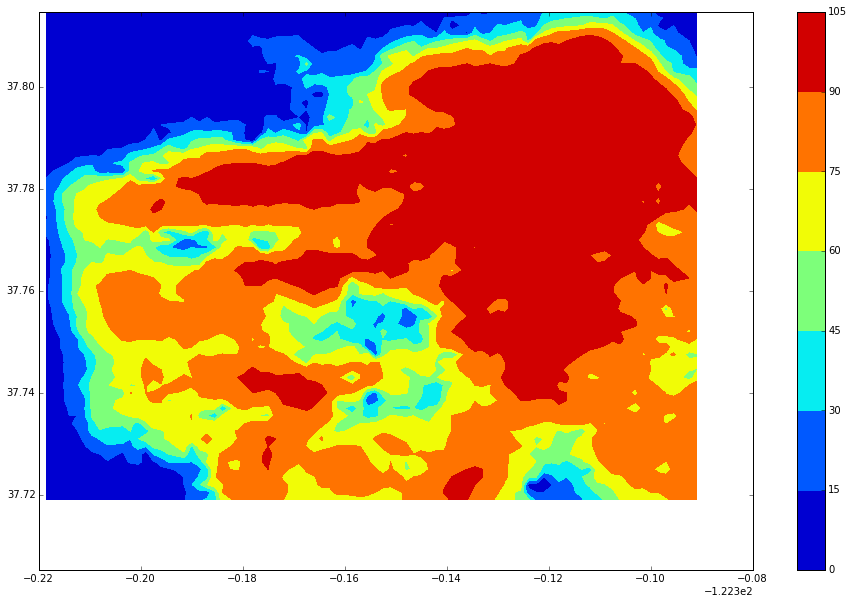

In [16]:
plt.contourf(x, y, z)
plt.axis('equal')
plt.colorbar()

In [17]:
print min(x), max(x), min(y), max(y)

-122.5185 -122.391 37.719 37.8195


# Population density

In [22]:
pop = get_db('usc_pop')
pop.head()

,block,block_group,tract,id2,total
0,101,1,1000,60750101001000,0
1,101,1,1001,60750101001001,44
2,101,1,1002,60750101001002,0
3,101,1,1003,60750101001003,0
4,101,1,1004,60750101001004,1


In [23]:
sf = get_db('usc_shapefile')
sf.head()

,state,county,tract,block,geoid,name,mtfcc,land_area,water_area,lat,lon
0,06,075,021300,2002,60750213002002,Block 2002,G5040,16958,0,37.750067,-122.441075
1,06,075,021300,2000,60750213002000,Block 2000,G5040,16823,0,37.750196,-122.438933
2,06,075,020500,3004,60750205003004,Block 3004,G5040,17020,0,37.756794,-122.436270
3,06,075,021200,1003,60750212001003,Block 1003,G5040,16415,0,37.753529,-122.437050
4,06,075,021100,4001,60750211004001,Block 4001,G5040,17523,0,37.755758,-122.433400


In [66]:
pdf = pop.merge(sf, left_on='id2', right_on='geoid').sort_values(by = ['lon', 'lat'])
pdf = pdf[pdf.lon > -122.5185]
pdf = pdf[pdf.lon < -122.35454]
# pdf = pdf[pdf.lat > 37.70784]
# pdf = pdf[pdf.lat < 37.8195]
pdf.head()

,block_x,block_group,tract_x,id2,total,state,county,tract_y,block_y,geoid,name,mtfcc,land_area,water_area,lat,lon
6326,479.01,2,2002,60750479012002,0,06,075,047901,2002,60750479012002,Block 2002,G5040,22643,0,37.778446,-122.515866
7104,9803.00,1,1023,60759803001023,0,06,075,980300,1023,60759803001023,Block 1023,G5040,0,287384,37.767179,-122.514994
6324,479.01,2,2000,60750479012000,0,06,075,047901,2000,60750479012000,Block 2000,G5040,0,2563770,37.795001,-122.513993
6327,479.01,2,2003,60750479012003,0,06,075,047901,2003,60750479012003,Block 2003,G5040,256634,0,37.781286,-122.513657
5812,352.01,2,2004,60750352012004,0,06,075,035201,2004,60750352012004,Block 2004,G5040,0,630051,37.756112,-122.513469


In [67]:
pdf.shape

(7334, 16)

In [37]:
x = pdf.lon
y = pdf.lat
z = pdf.total

In [38]:
print min(x), max(x), min(y), max(y)

-123.0991409 -122.3302387 37.6982781 37.8505976


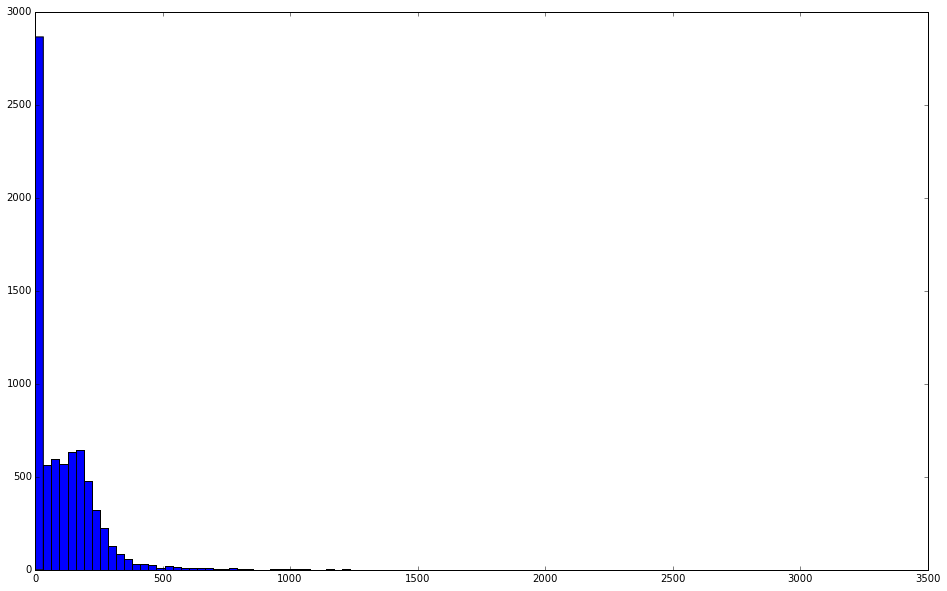

In [40]:
plt.hist(z, bins=100);

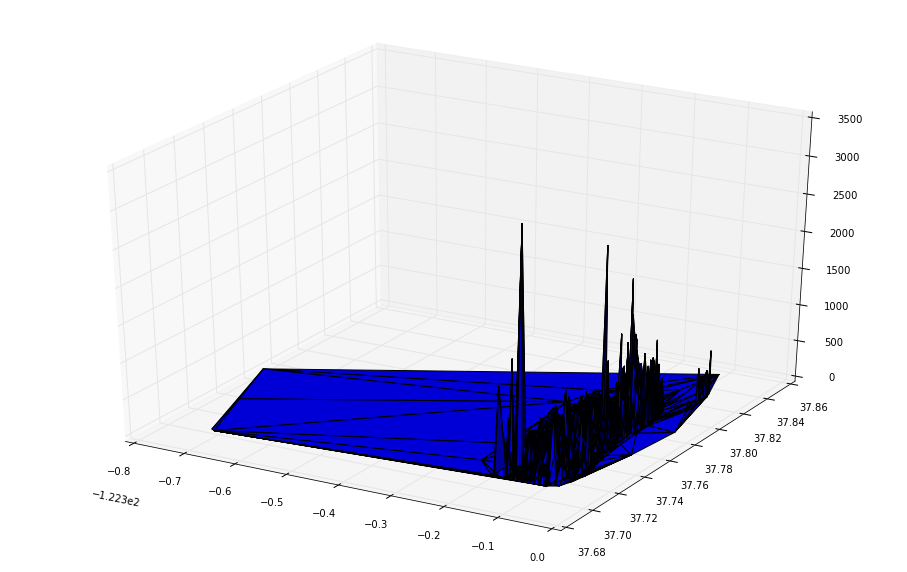

In [41]:
# http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x, y, z)

In [51]:
# http://stackoverflow.com/questions/9008370/python-2d-contour-plot-from-3-lists-x-y-and-rho

import scipy.interpolate

In [52]:
x = pdf.lon
y = pdf.lat
z = pdf.total

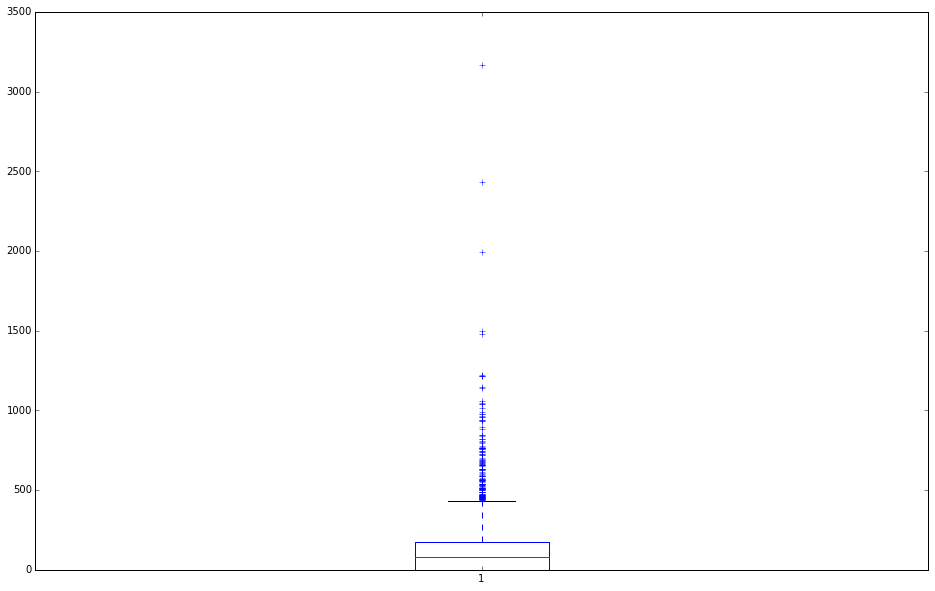

In [61]:
plt.boxplot(z);

In [53]:
# Set up a regular grid of interpolation points
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

In [54]:
# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

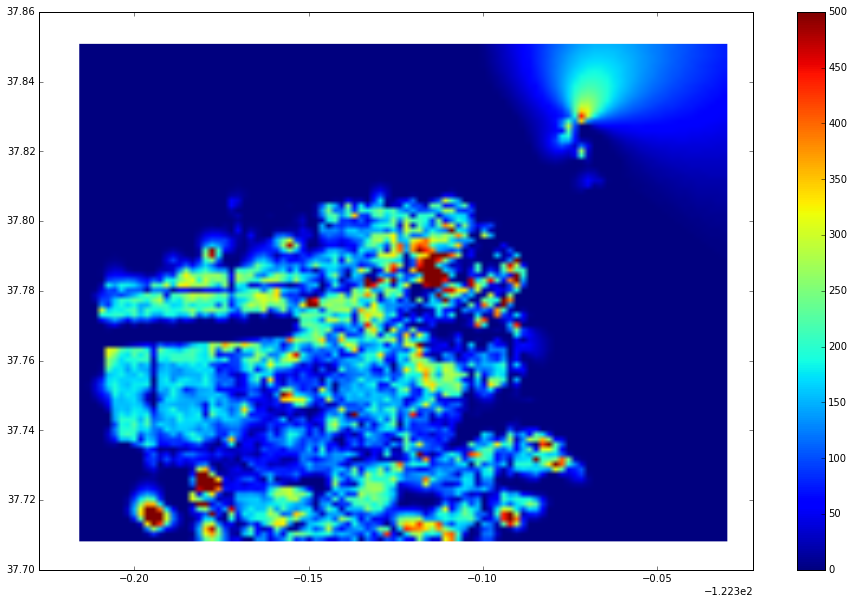

In [64]:
plt.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.scatter(x, y, c=z)
plt.clim(0, 500)
plt.axis('equal')
plt.colorbar()
plt.show()

In [65]:
print z.sum(), zi.sum()

805235 523173.205136
